In [1]:
#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score
sns.set_style("whitegrid")
%matplotlib inline
 
#Import data
df = pd.read_csv('bank-full.csv', sep=';')
 
#Encode categorical variables
print('Converting categorical variables to numeric...')
 
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
'loan', 'contact', 'day', 'month', 'campaign',
'previous', 'poutcome']
 
use_cols = ['month', 'campaign', 'y']
 
df['y'] = df['y'].map({'yes':1, 'no':0})
 
for c in categorical_columns:
    df[c] = df[c].astype('category')
    df[c] = df[c].cat.codes

Converting categorical variables to numeric...


In [2]:
train_df, test_df = train_test_split(df, test_size = 0.25, random_state= 1984)
 
#Separate target label
train_y = train_df['y']
test_y = test_df['y']
 
#Drop target label
train_x = train_df.drop(['y'], axis = 1)
test_x = test_df.drop(['y'], axis = 1)

In [3]:
#Build Random Forest model
model1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
model1.fit(train_x,train_y)
model2 = RandomForestClassifier(max_depth=12, n_estimators = 120)
model2.fit(train_x,train_y)
 
#Predict test set
pred1 = model1.predict_proba(test_x)
pred2 = model2.predict_proba(test_x)

In [4]:
 
# Plot AUC-ROC
fpr1, tpr1, threshold1 = roc_curve(test_y, pred1[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(test_y, pred2[:,1])
roc_auc2 = auc(fpr2, tpr2)

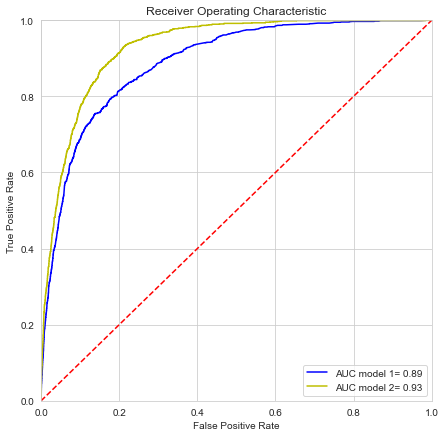

In [6]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC model 1= %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'y', label = 'AUC model 2= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [9]:
type(test_y)

pandas.core.series.Series

In [10]:
type(pred2)

numpy.ndarray

In [13]:
test_y.shape, len(pred2)

((11303,), 11303)

In [18]:
import scikitplot as skplt
help(skplt.metrics.plot_cumulative_gain)

Help on function plot_cumulative_gain in module scikitplot.metrics:

plot_cumulative_gain(y_true, y_probas, title='Cumulative Gains Curve', ax=None, figsize=None, title_fontsize='large', text_fontsize='medium')
    Generates the Cumulative Gains Plot from labels and scores/probabilities
    
    The cumulative gains chart is used to determine the effectiveness of a
    binary classifier. A detailed explanation can be found at
    http://mlwiki.org/index.php/Cumulative_Gain_Chart. The implementation
    here works only for binary classification.
    
    Args:
        y_true (array-like, shape (n_samples)):
            Ground truth (correct) target values.
    
        y_probas (array-like, shape (n_samples, n_classes)):
            Prediction probabilities for each class returned by a classifier.
    
        title (string, optional): Title of the generated plot. Defaults to
            "Cumulative Gains Curve".
    
        ax (:class:`matplotlib.axes.Axes`, optional): The axes upon w

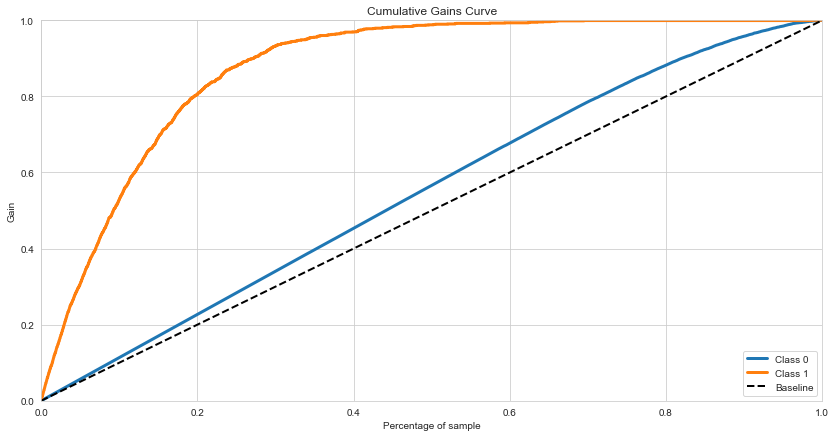

In [21]:
skplt.metrics.plot_cumulative_gain(test_y, pred2, figsize=(14,7))
plt.show()